In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("4-2_skill_level.csv",index_col=0)

In [3]:
from sklearn.cluster import KMeans
vec = KMeans(n_clusters = 3)
group_num = vec.fit_predict(df)

In [5]:
df_calc = df.copy()
df_calc["グループ名"] = group_num

df_calc.groupby("グループ名").mean()

コミュニケーション   リーダーシップ   プログラミング  ネットワーク知識  セキュリティ知識
グループ名                                                   
0       7.500000  6.750000  9.250000  9.000000  8.750000
1       4.000000  3.250000  5.500000  5.375000  5.375000
2       8.666667  9.333333  5.333333  6.333333  7.333333

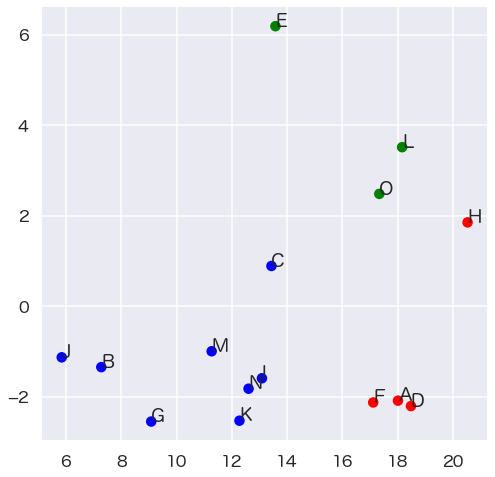

In [6]:
from sklearn.decomposition import TruncatedSVD

model_svd = TruncatedSVD(n_components=2)
vecs_list = model_svd.fit_transform(df)

X = vecs_list[:,0]
Y = vecs_list[:,1]

sns.set(font="Hiragino Maru Gothic Pro",context="talk")
plt.figure(figsize=(8, 8))

color_codes = {0:"red",1:"blue",2:"green",3:"yellow"}
colors = [color_codes[x] for x in group_num]
plt.scatter(X,Y,color=colors)

for i,(x_name,y_name) in enumerate(zip(X,Y)):
    plt.annotate(df.index[i],(x_name,y_name))
plt.show()